In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'P_50_T_250',
                          'min_5e-24_max_5e-19_ng_7',
                          'wgt_.9_.5_.4_.4_.3_.5_1',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03a_wn_540_620',
                               'P_50_T_250',
                               'min_5e-24_max_5e-19_ng_7',
                               'wgt_.9_.5_.4_.4_.3_.5_1',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6, 7]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

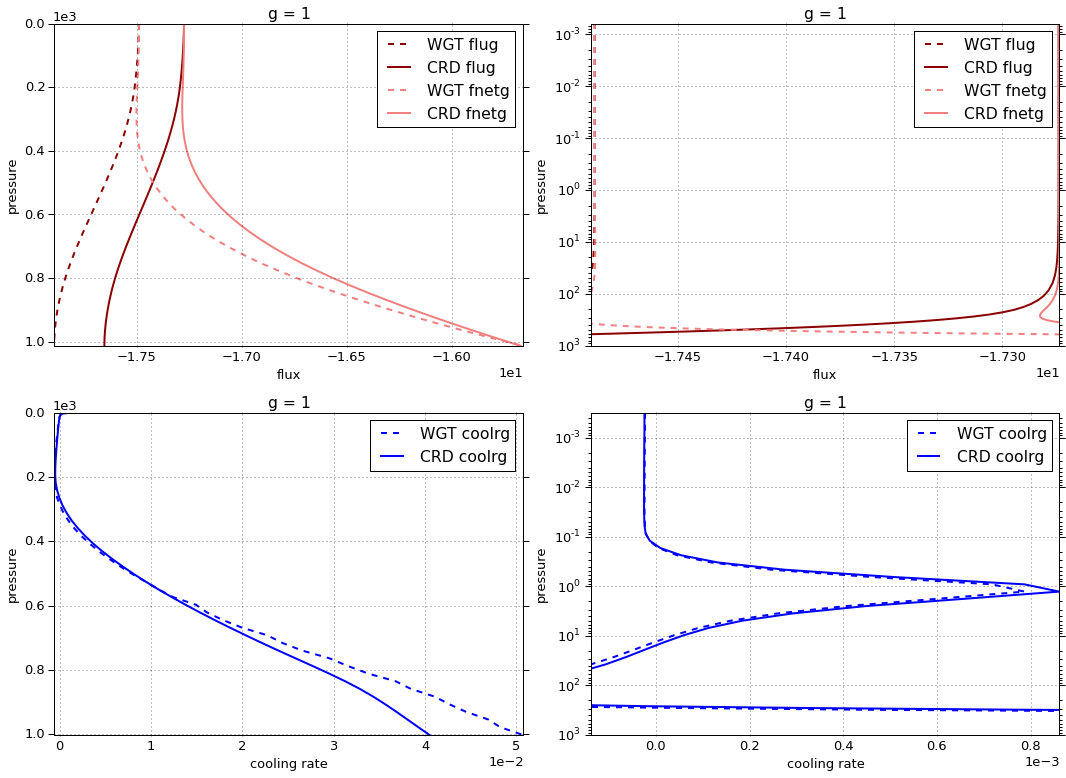

# Figure: flux, cooling rate. g-group 2

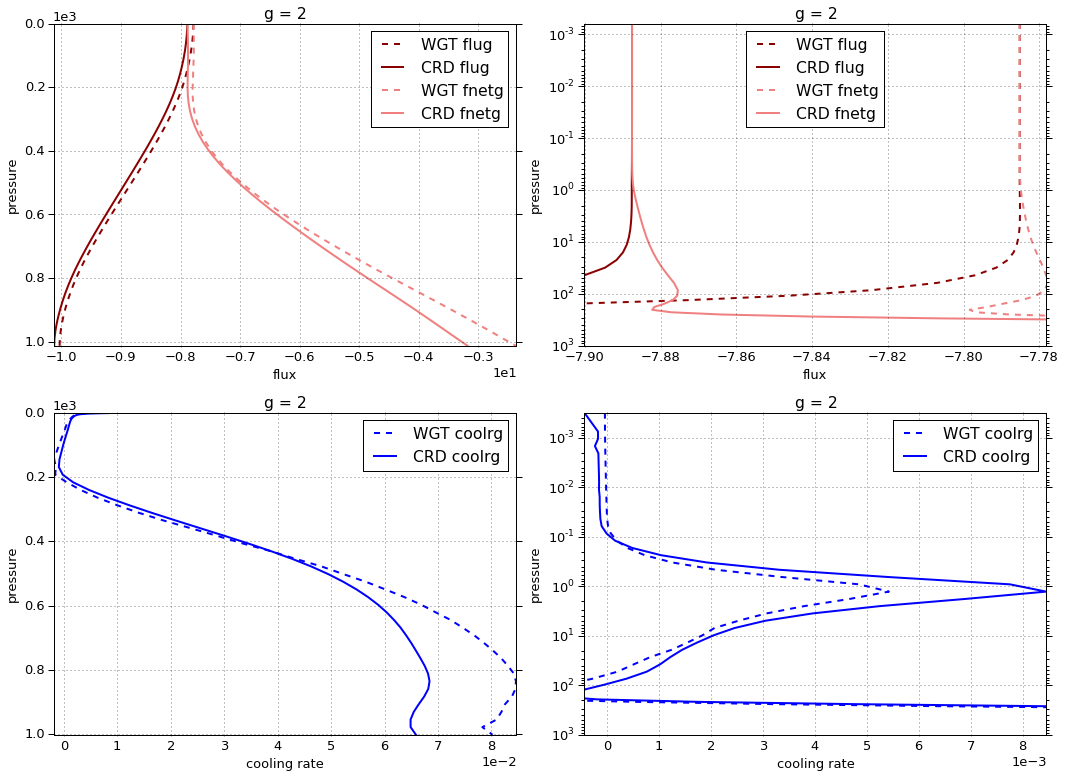

# Figure: flux, cooling rate. g-group 3

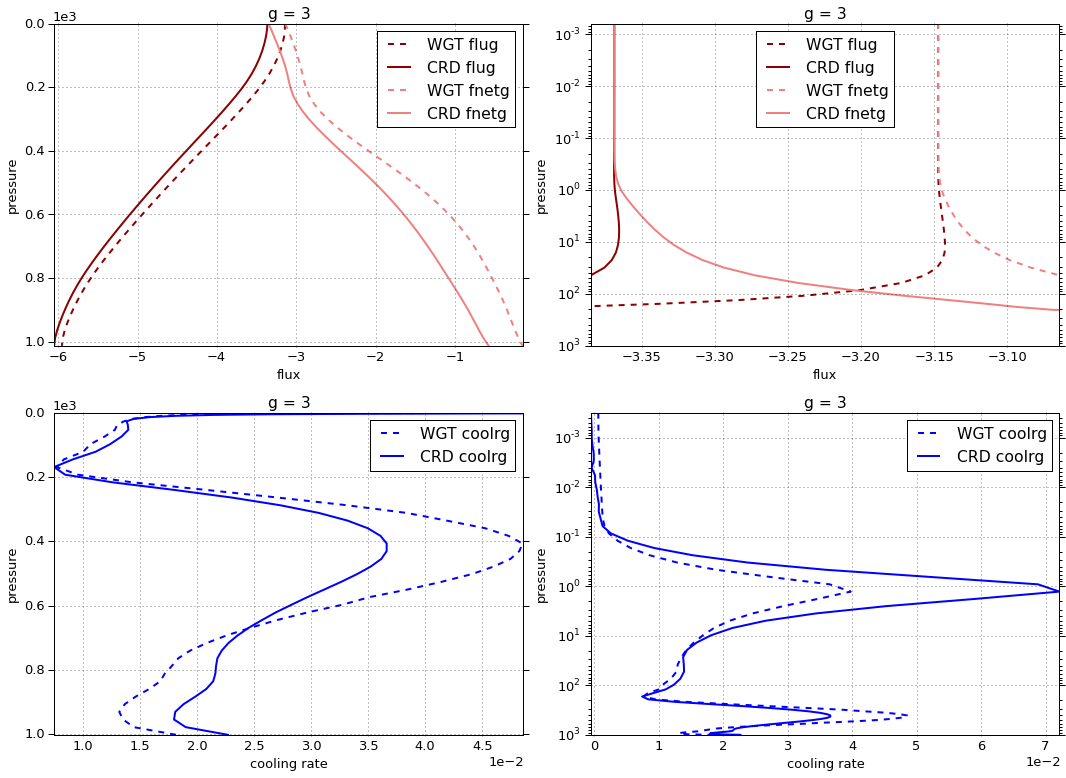

# Figure: flux, cooling rate. g-group 4

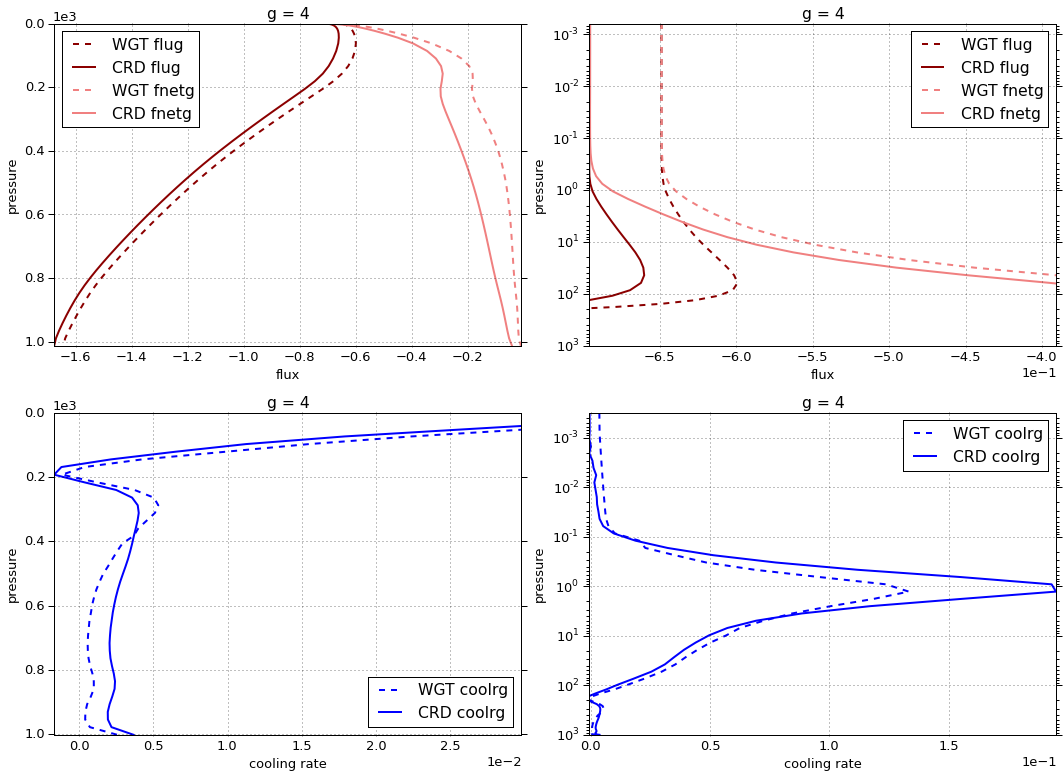

# Figure: flux, cooling rate. g-group 5

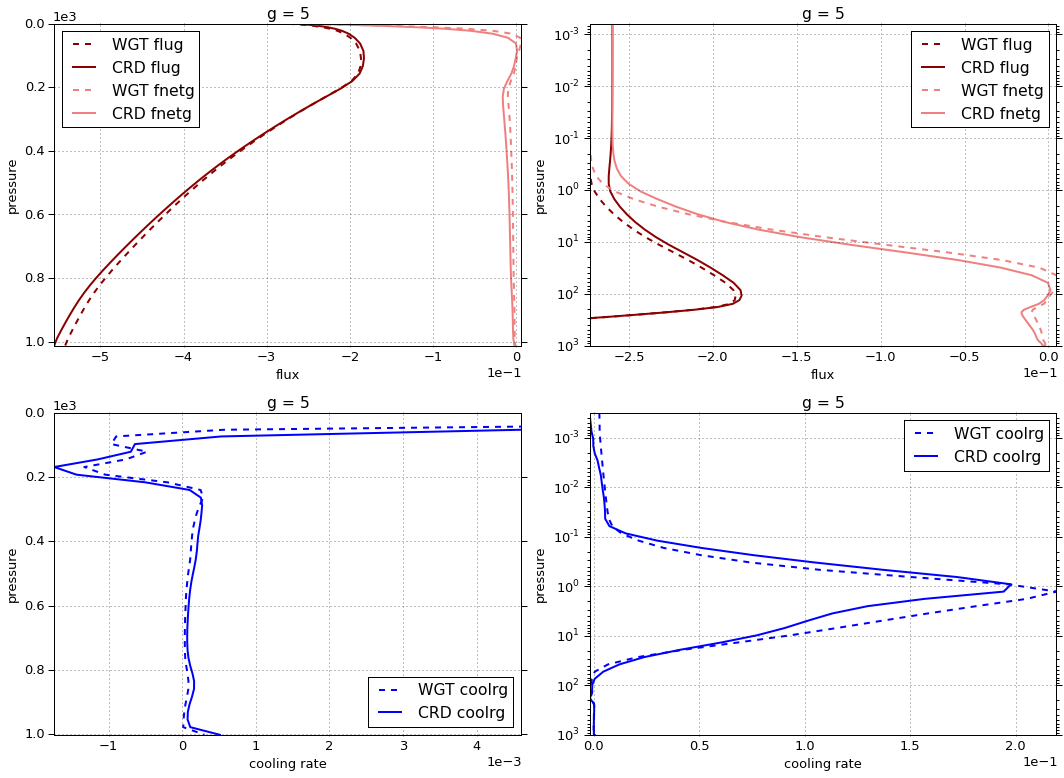

# Figure: flux, cooling rate. g-group 6

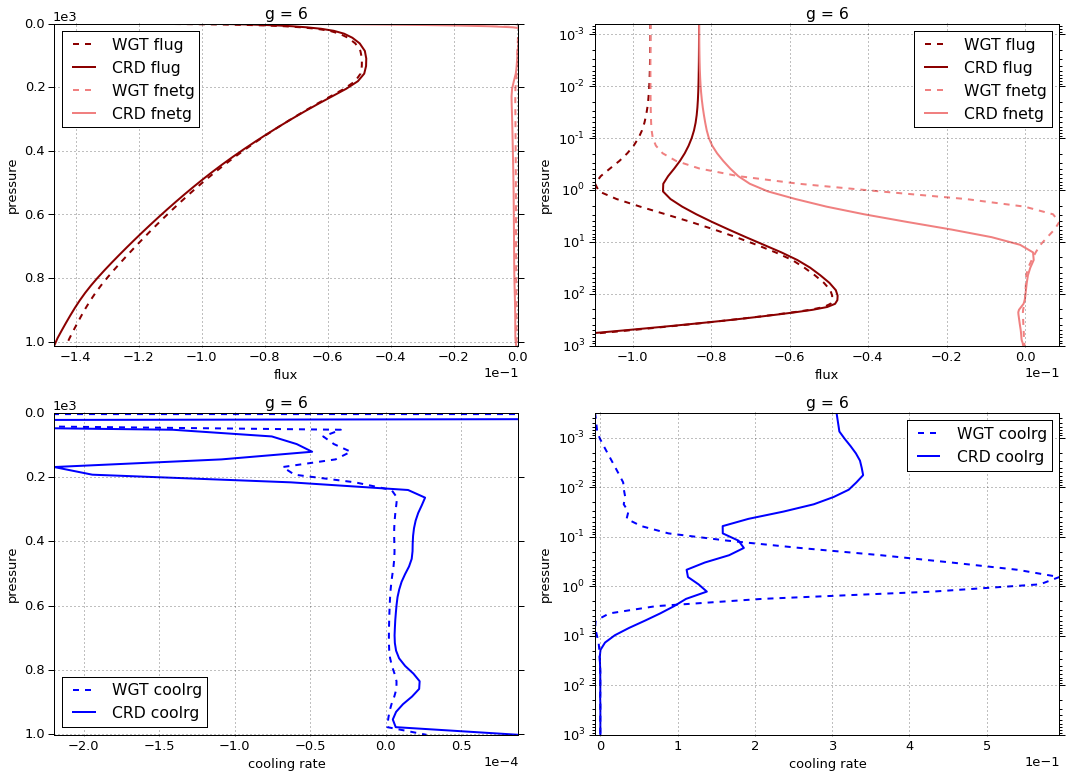

# Figure: flux, cooling rate. g-group 7

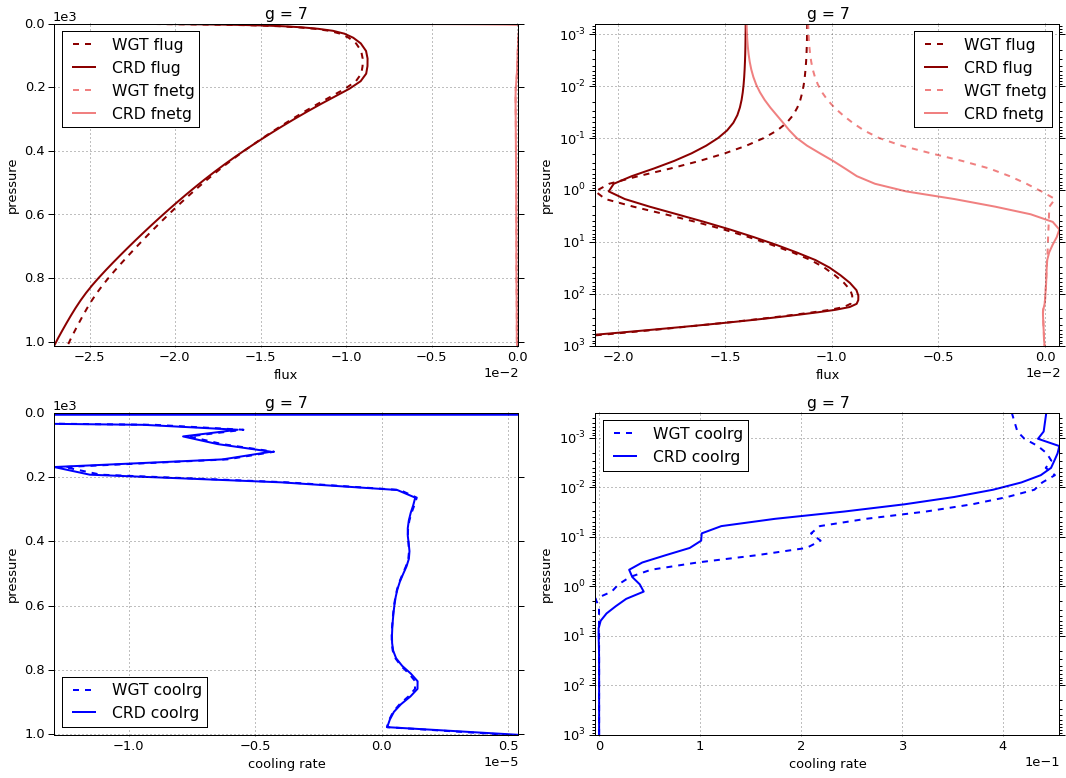

# Figure: flux, cooling rate. g-group total

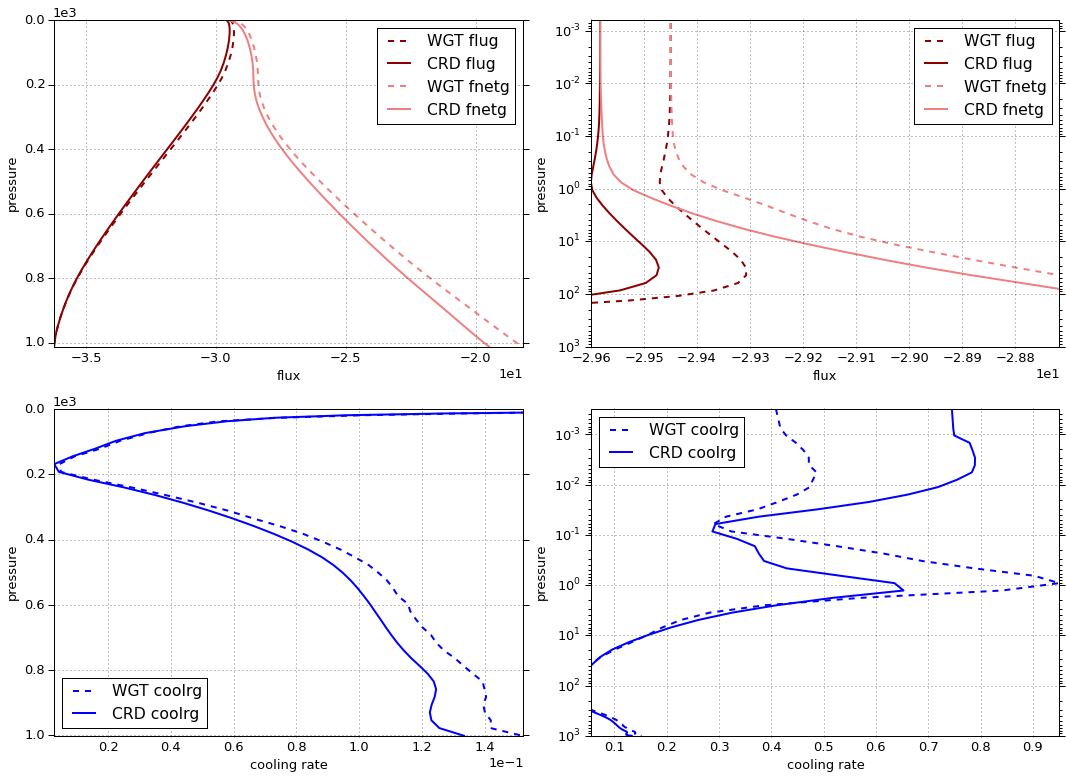

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -17.274023  0.000000 -17.274023
  1013     76    -17.653253  1.982048 -15.671205
2 0        1      -7.887605  0.000000  -7.887605
  1013     76    -10.122455  6.940663  -3.181792
3 0        1      -3.368837  0.000000  -3.368837
  1013     76     -6.052099  5.477384  -0.574715
4 0        1      -0.695559  0.000000  -0.695559
  1013     76     -1.678040  1.637050  -0.040989
5 0        1      -0.260110  0.000000  -0.260110
  1013     76     -0.555727  0.553833  -0.001895
6 0        1      -0.083118  0.000000  -0.083118
  1013     76     -0.146775  0.146516  -0.000258
7 0        1      -0.014023  0.000000  -0.014023
  1013     76     -0.027070  0.027055  -0.000015


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -17.488587  0.000000 -17.488587
  1013     76    -17.892366  2.230105 -15.662261
2 0        1      -7.785150  0.000000  -7.785150
  1013     76    -10.031035  7.660260  -2.370775
3 0        1      -3.147319  0.000000  -3.147319
  1013     76     -5.954731  5.807989  -0.146742
4 0        1      -0.648876  0.000000  -0.648876
  1013     76     -1.645388  1.636178  -0.009209
5 0        1      -0.273571  0.000000  -0.273571
  1013     76     -0.542569  0.541725  -0.000844
6 0        1      -0.095538  0.000000  -0.095538
  1013     76     -0.143038  0.142963  -0.000075
7 0        1      -0.011135  0.000000  -0.011135
  1013     76     -0.026292  0.026279  -0.000014


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.214564  0.000000 -0.214564
  1013     76    -0.239113  0.248057  0.008944
2 0        1      0.102455  0.000000  0.102455
  1013     76     0.091420  0.719597  0.811017
3 0        1      0.221517  0.000000  0.221517
  1013     76     0.097367  0.330605  0.427972
4 0        1      0.046682  0.000000  0.046682
  1013     76     0.032652 -0.000872  0.031780
5 0        1     -0.013460  0.000000 -0.013460
  1013     76     0.013159 -0.012108  0.001051
6 0        1     -0.012420  0.000000 -0.012420
  1013     76     0.003737 -0.003554  0.000184
7 0        1      0.002888  0.000000  0.002888
  1013     76     0.000777 -0.000776  0.000001

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.040481
2 0.000312    1     -0.000442
  1001.112500 75     0.065887
3 0.000312    1     -0.000477
  1001.112500 75     0.022697
4 0.000312    1     -0.000487
  1001.112500 75     0.003668
5 0.000312    1     -0.001950
  1001.112500 75     0.000512
6 0.000312    1      0.305726
  1001.112500 75     0.000088
7 0.000312    1      0.442977
  1001.112500 75     0.000005


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.050686
2 0.000312    1     -0.000046
  1001.112500 75     0.080210
3 0.000312    1      0.000663
  1001.112500 75     0.018156
4 0.000312    1      0.003607
  1001.112500 75     0.002573
5 0.000312    1      0.002718
  1001.112500 75     0.000303
6 0.000312    1     -0.006767
  1001.112500 75     0.000027
7 0.000312    1      0.408764
  1001.112500 75     0.000005


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.159267e-06
  1001.112500 75     1.020549e-02
2 0.000312    1      3.961789e-04
  1001.112500 75     1.432325e-02
3 0.000312    1      1.140041e-03
  1001.112500 75    -4.541604e-03
4 0.000312    1      4.093350e-03
  1001.112500 75    -1.094538e-03
5 0.000312    1      4.667687e-03
  1001.112500 75    -2.086007e-04
6 0.000312    1     -3.124935e-01
  1001.112500 75    -6.086458e-05
7 0.000312    1     -3.421237e-02
  1001.112500 75    -4.174800e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.583274,0.000000,-29.583274
1013,76,-36.235418,16.764549,-19.470870



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.450175,0.000000,-29.450175
1013,76,-36.235419,18.045499,-18.189921



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.330991e-01,0.00000,0.133099
1013,76,-9.780000e-07,1.28095,1.280949


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.745324
1001.112500,75,0.133338



WGT


,,coolrg
pressure,layer,
0.000312,1,0.408916
1001.112500,75,0.151961



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.336407
1001.112500,75,0.018623


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.486938,0.493781
2,0.279313,0.276830
3,0.167187,0.164335
4,0.046375,0.045408
5,0.015375,0.014973
6,0.004063,0.003947
7,0.000750,0.000726


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -17.488587  0.000000e+00 -17.488587   1     1   
0.000624      1     2 -17.488587  1.575360e-09 -17.488587   1     2   
0.000876      1     3 -17.488587  2.221137e-09 -17.488587   1     3   
0.001229      1     4 -17.488587  3.156347e-09 -17.488587   1     4   
0.001723      1     5 -17.488587  4.516480e-09 -17.488587   1     5   
0.002417      1     6 -17.488587  6.494552e-09 -17.488587   1     6   
0.003391      1     7 -17.488587  9.371640e-09 -17.488587   1     7   
0.004757      1     8 -17.488587  1.355654e-08 -17.488587   1     8   
0.006672      1     9 -17.488587  1.964363e-08 -17.488587   1     9   
0.009359      1    10 -17.488587  2.849842e-08 -17.488587   1    10   
0.013128      1    11 -17.488587  4.138071e-08 -17.488587   1    11   
0.018415      1    12 -17.488587  6.012586e-08 -17.488587   1    12   
0.025830      1    13 -17.488587  8.740919e-08 -17.488587   1    13   
0.036232      1    14 -17.488587  1.271409e-07 -17.488587   1    14   
0.050823      1    15 -17.488587  1.854012e-07 -17.488587   1    15   
0.071291      1    16 -17.488587  2.775478e-07 -17.488587   1    16   
0.100000      1    17 -17.488588  4.510932e-07 -17.488587   1    17   
0.140271      1    18 -17.488588  8.192909e-07 -17.488587   1    18   
0.196760      1    19 -17.488589  1.612892e-06 -17.488587   1    19   
0.275997      1    20 -17.488590  3.324354e-06 -17.488587   1    20   
0.387100      1    21 -17.488592  7.012089e-06 -17.488585   1    21   
0.543100      1    22 -17.488596  1.495639e-05 -17.488581   1    22   
0.761700      1    23 -17.488601  3.190361e-05 -17.488569   1    23   
1.068500      1    24 -17.488607  6.491751e-05 -17.488543   1    24   
1.498800      1    25 -17.488617  1.142751e-04 -17.488502   1    25   
2.102400      1    26 -17.488631  1.711614e-04 -17.488460   1    26   
2.949000      1    27 -17.488652  2.328842e-04 -17.488419   1    27   
4.136600      1    28 -17.488683  3.002437e-04 -17.488382   1    28   
5.802500      1    29 -17.488727  3.761148e-04 -17.488351   1    29   
8.139200      1    30 -17.488792  4.659397e-04 -17.488326   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -17.548230  4.895467e-02 -17.499276   1    47   
347.300000    1    48 -17.559010  6.246964e-02 -17.496541   1    48   
371.075000    1    49 -17.570779  7.876909e-02 -17.492010   1    49   
394.850000    1    50 -17.583451  9.813694e-02 -17.485314   1    50   
418.625000    1    51 -17.596844  1.208370e-01 -17.476007   1    51   
442.400000    1    52 -17.611058  1.471177e-01 -17.463941   1    52   
466.175000    1    53 -17.625840  1.772025e-01 -17.448637   1    53   
489.950000    1    54 -17.641189  2.112901e-01 -17.429899   1    54   
513.725000    1    55 -17.656981  2.495629e-01 -17.407418   1    55   
537.500000    1    56 -17.673011  2.921944e-01 -17.380817   1    56   
561.275000    1    57 -17.689361  3.391069e-01 -17.350254   1    57   
585.050000    1    58 -17.705858  3.906371e-01 -17.315220   1    58   
608.825000    1    59 -17.722219  4.490437e-01 -17.273175   1    59   
632.600000    1    60 -17.738594  5.108442e-01 -17.227749   1    60   
656.375000    1    61 -17.754707  5.773477e-01 -17.177359   1    61   
680.150000    1    62 -17.770348  6.492822e-01 -17.121065   1    62   
703.925000    1    63 -17.785643  7.286838e-01 -17.056959   1    63   
727.700000    1    64 -17.800180  8.119445e-01 -16.988236   1    64   
751.475000    1    65 -17.814068  9.007430e-01 -16.913325   1    65   
775.250000    1    66 -17.827037  9.969172e-01 -16.830120   1    66   
799.025000    1    67 -17.838861  1.097588e+00 -16.741273   1    67   
822.800000    1    68 -17.849699  1.203613e+00 -16.646086   1    68   
846.575000    1    69 -17.859339  1.

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                          crd                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      2     1  -7.785150  0.000000e+00 -7.785150   2     1  -7.887605   
0.000624      2     2  -7.785150  1.152663e-08 -7.785150   2     2  -7.887605   
0.000876      2     3  -7.785150  1.624226e-08 -7.785150   2     3  -7.887605   
0.001229      2     4  -7.785150  2.303852e-08 -7.785150   2     4  -7.887605   
0.001723      2     5  -7.785150  3.287283e-08 -7.785150   2     5  -7.887605   
0.002417      2     6  -7.785150  4.710397e-08 -7.785150   2     6  -7.887605   
0.003391      2     7  -7.785150  6.770223e-08 -7.785150   2     7  -7.887605   
0.004757      2     8  -7.785150  9.752174e-08 -7.785150   2     8  -7.887605   
0.006672      2     9  -7.785150  1.406972e-07 -7.785150   2     9  -7.887605   
0.009359      2    10  -7.785150  2.032316e-07 -7.785150   2    10  -7.887605   
0.013128      2    11  -7.785150  2.938417e-07 -7.785150   2    11  -7.887606   
0.018415      2    12  -7.785150  4.252100e-07 -7.785150   2    12  -7.887606   
0.025830      2    13  -7.785151  6.158213e-07 -7.785150   2    13  -7.887607   
0.036232      2    14  -7.785151  8.927363e-07 -7.785150   2    14  -7.887607   
0.050823      2    15  -7.785151  1.298059e-06 -7.785150   2    15  -7.887608   
0.071291      2    16  -7.785152  1.931860e-06 -7.785150   2    16  -7.887610   
0.100000      2    17  -7.785153  3.081855e-06 -7.785150   2    17  -7.887612   
0.140271      2    18  -7.785154  5.395066e-06 -7.785149   2    18  -7.887616   
0.196760      2    19  -7.785156  1.012581e-05 -7.785146   2    19  -7.887622   
0.275997      2    20  -7.785159  1.982728e-05 -7.785139   2    20  -7.887631   
0.387100      2    21  -7.785163  3.975452e-05 -7.785123   2    21  -7.887643   
0.543100      2    22  -7.785165  8.079722e-05 -7.785084   2    22  -7.887658   
0.761700      2    23  -7.785162  1.648311e-04 -7.784997   2    23  -7.887671   
1.068500      2    24  -7.785146  3.249017e-04 -7.784821   2    24  -7.887676   
1.498800      2    25  -7.785116  5.721718e-04 -7.784544   2    25  -7.887671   
2.102400      2    26  -7.785093  8.835978e-04 -7.784210   2    26  -7.887688   
2.949000      2    27  -7.785092  1.262400e-03 -7.783830   2    27  -7.887745   
4.136600      2    28  -7.785131  1.732442e-03 -7.783398   2    28  -7.887864   
5.802500      2    29  -7.785238  2.338751e-03 -7.782899   2    29  -7.888073   
8.139200      2    30  -7.785486  3.159061e-03 -7.782327   2    30  -7.888423   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    2    47  -8.261582  5.595071e-01 -7.702075   2    47  -8.370069   
347.300000    2    48  -8.330438  6.810636e-01 -7.649375   2    48  -8.438425   
371.075000    2    49  -8.402096  8.196984e-01 -7.582398   2    49  -8.509465   
394.850000    2    50  -8.476482  9.749483e-01 -7.501534   2    50  -8.582701   
418.625000    2    51  -8.552751  1.145605e+00 -7.407146   2    51  -8.657667   
442.400000    2    52  -8.630572  1.332579e+00 -7.297993   2    52  -8.733955   
466.175000    2    53  -8.709647  1.533723e+00 -7.175924   2    53  -8.811215   
489.950000    2    54  -8.789572  1.749525e+00 -7.040047   2    54  -8.889152   
513.725000    2    55  -8.869907  1.977254e+00 -6.892652   2    55  -8.967513   
537.500000    2    56  -8.950600  2.217088e+00 -6.733512   2    56  -9.046042   
561.275000    2    57  -9.031176  2.467116e+00 -6.564061   2    57  -9.124480   
585.050000    2    58  -9.111352  2.726733e+00 -6.384620   2    58  -9.202559   
608.825000    2    59  -9.190827  2.994546e+00 -6.196281   2    59  -9.279984   
632.600000    2    60  -9.269194  3.268919e+00 -6.000274   2    60  -9.356459   
656.375000    2    61  -9.346041  3.549666e+00 -5.796374   2    61  -9.431645   
680.150000    2    62  -9.421071  3.834896e

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -3.147319  0.000000e+00 -3.147319   3     1 -3.368837   
0.000624      3     2 -3.147319  1.187293e-07 -3.147319   3     2 -3.368837   
0.000876      3     3 -3.147319  1.671970e-07 -3.147319   3     3 -3.368837   
0.001229      3     4 -3.147319  2.367335e-07 -3.147319   3     4 -3.368837   
0.001723      3     5 -3.147319  3.368706e-07 -3.147319   3     5 -3.368838   
0.002417      3     6 -3.147320  4.810753e-07 -3.147319   3     6 -3.368838   
0.003391      3     7 -3.147320  6.887763e-07 -3.147319   3     7 -3.368839   
0.004757      3     8 -3.147320  9.879665e-07 -3.147319   3     8 -3.368839   
0.006672      3     9 -3.147320  1.418972e-06 -3.147319   3     9 -3.368840   
0.009359      3    10 -3.147320  2.039994e-06 -3.147318   3    10 -3.368842   
0.013128      3    11 -3.147321  2.935015e-06 -3.147318   3    11 -3.368844   
0.018415      3    12 -3.147321  4.225373e-06 -3.147317   3    12 -3.368847   
0.025830      3    13 -3.147322  6.086546e-06 -3.147316   3    13 -3.368850   
0.036232      3    14 -3.147323  8.773153e-06 -3.147314   3    14 -3.368856   
0.050823      3    15 -3.147325  1.267684e-05 -3.147312   3    15 -3.368864   
0.071291      3    16 -3.147327  1.867390e-05 -3.147308   3    16 -3.368875   
0.100000      3    17 -3.147329  2.910198e-05 -3.147300   3    17 -3.368892   
0.140271      3    18 -3.147332  4.888197e-05 -3.147283   3    18 -3.368915   
0.196760      3    19 -3.147332  8.697503e-05 -3.147245   3    19 -3.368944   
0.275997      3    20 -3.147325  1.605259e-04 -3.147164   3    20 -3.368976   
0.387100      3    21 -3.147298  3.027629e-04 -3.146995   3    21 -3.368997   
0.543100      3    22 -3.147224  5.785849e-04 -3.146645   3    22 -3.368967   
0.761700      3    23 -3.147046  1.110465e-03 -3.145935   3    23 -3.368802   
1.068500      3    24 -3.146681  2.073889e-03 -3.144607   3    24 -3.368374   
1.498800      3    25 -3.146111  3.532264e-03 -3.142579   3    25 -3.367666   
2.102400      3    26 -3.145471  5.373276e-03 -3.140097   3    26 -3.366916   
2.949000      3    27 -3.144771  7.614167e-03 -3.137157   3    27 -3.366258   
4.136600      3    28 -3.144071  1.037182e-02 -3.133699   3    28 -3.365771   
5.802500      3    29 -3.143411  1.386371e-02 -3.129547   3    29 -3.365536   
8.139200      3    30 -3.142858  1.845724e-02 -3.124401   3    30 -3.365650   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -3.895077  1.398260e+00 -2.496816   3    47 -4.101443   
347.300000    3    48 -3.987661  1.608819e+00 -2.378842   3    48 -4.189767   
371.075000    3    49 -4.080162  1.828845e+00 -2.251317   3    49 -4.278582   
394.850000    3    50 -4.172935  2.054933e+00 -2.118003   3    50 -4.367407   
418.625000    3    51 -4.265389  2.284134e+00 -1.981255   3    51 -4.455761   
442.400000    3    52 -4.357229  2.511915e+00 -1.845314   3    52 -4.543324   
466.175000    3    53 -4.447996  2.736465e+00 -1.711530   3    53 -4.629891   
489.950000    3    54 -4.538105  2.956237e+00 -1.581867   3    54 -4.715387   
513.725000    3    55 -4.627197  3.169504e+00 -1.457693   3    55 -4.799835   
537.500000    3    56 -4.714969  3.374043e+00 -1.340926   3    56 -4.883222   
561.275000    3    57 -4.802336  3.569829e+00 -1.232508   3    57 -4.965561   
585.050000    3    58 -4.888185  3.754620e+00 -1.133565   3    58 -5.046791   
608.825000    3    59 -4.973319  3.931958e+00 -1.041362   3    59 -5.126843   
632.600000    3    60 -5.057001  4.099306e+00 -0.957695   3    60 -5.205624   
656.375000    3    61 -5.139262  4.257636e+00 -0.881626   3    61 -5.283012   
680.150000    3    62 -5.220136  4.408070e+00 -0.812066   3    62 -5.358854   
703.925000    3    63 -5.299071  4.550667e+00 -0.748404   3   

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.648876  0.000000e+00 -0.648876   4     1 -0.695559   
0.000624      4     2 -0.648876  4.134664e-07 -0.648876   4     2 -0.695560   
0.000876      4     3 -0.648876  5.823318e-07 -0.648876   4     3 -0.695560   
0.001229      4     4 -0.648877  8.248309e-07 -0.648876   4     4 -0.695561   
0.001723      4     5 -0.648877  1.174381e-06 -0.648875   4     5 -0.695562   
0.002417      4     6 -0.648877  1.678228e-06 -0.648875   4     6 -0.695563   
0.003391      4     7 -0.648877  2.404575e-06 -0.648875   4     7 -0.695565   
0.004757      4     8 -0.648877  3.451760e-06 -0.648874   4     8 -0.695567   
0.006672      4     9 -0.648878  4.961524e-06 -0.648873   4     9 -0.695570   
0.009359      4    10 -0.648878  7.138549e-06 -0.648871   4    10 -0.695575   
0.013128      4    11 -0.648879  1.027829e-05 -0.648869   4    11 -0.695582   
0.018415      4    12 -0.648880  1.480774e-05 -0.648865   4    12 -0.695591   
0.025830      4    13 -0.648882  2.134452e-05 -0.648860   4    13 -0.695605   
0.036232      4    14 -0.648883  3.078465e-05 -0.648853   4    14 -0.695624   
0.050823      4    15 -0.648886  4.450638e-05 -0.648842   4    15 -0.695651   
0.071291      4    16 -0.648889  6.561552e-05 -0.648824   4    16 -0.695689   
0.100000      4    17 -0.648892  1.024197e-04 -0.648789   4    17 -0.695744   
0.140271      4    18 -0.648864  1.722132e-04 -0.648692   4    18 -0.695820   
0.196760      4    19 -0.648845  3.058780e-04 -0.648539   4    19 -0.695918   
0.275997      4    20 -0.648769  5.611076e-04 -0.648208   4    20 -0.696021   
0.387100      4    21 -0.648617  1.046511e-03 -0.647571   4    21 -0.696079   
0.543100      4    22 -0.648267  1.967099e-03 -0.646300   4    22 -0.695968   
0.761700      4    23 -0.647511  3.694050e-03 -0.643817   4    23 -0.695393   
1.068500      4    24 -0.646059  6.737934e-03 -0.639321   4    24 -0.693922   
1.498800      4    25 -0.643816  1.128974e-02 -0.632526   4    25 -0.691356   
2.102400      4    26 -0.641078  1.703104e-02 -0.624047   4    26 -0.688242   
2.949000      4    27 -0.637939  2.398086e-02 -0.613959   4    27 -0.684828   
4.136600      4    28 -0.634471  3.239379e-02 -0.602077   4    28 -0.681229   
5.802500      4    29 -0.630644  4.286202e-02 -0.587782   4    29 -0.677495   
8.139200      4    30 -0.626299  5.581170e-02 -0.570487   4    30 -0.673629   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.917173  7.906493e-01 -0.126523   4    47 -0.971162   
347.300000    4    48 -0.955191  8.414953e-01 -0.113696   4    48 -1.007674   
371.075000    4    49 -0.992368  8.899185e-01 -0.102449   4    49 -1.043414   
394.850000    4    50 -1.028441  9.363528e-01 -0.092088   4    50 -1.078300   
418.625000    4    51 -1.063442  9.795563e-01 -0.083886   4    51 -1.112238   
442.400000    4    52 -1.097231  1.020575e+00 -0.076656   4    52 -1.145158   
466.175000    4    53 -1.129882  1.059562e+00 -0.070320   4    53 -1.177055   
489.950000    4    54 -1.161442  1.096591e+00 -0.064851   4    54 -1.207995   
513.725000    4    55 -1.192086  1.131784e+00 -0.060302   4    55 -1.238079   
537.500000    4    56 -1.221874  1.165461e+00 -0.056413   4    56 -1.267410   
561.275000    4    57 -1.250951  1.197827e+00 -0.053124   4    57 -1.296067   
585.050000    4    58 -1.279358  1.229086e+00 -0.050273   4    58 -1.324099   
608.825000    4    59 -1.307176  1.259397e+00 -0.047779   4    59 -1.351539   
632.600000    4    60 -1.334405  1.288888e+00 -0.045517   4    60 -1.378408   
656.375000    4    61 -1.361106  1.317570e+00 -0.043536   4    61 -1.404716   
680.150000    4    62 -1.387276  1.345589e+00 -0.041688   4    62 -1.430463   
703.925000    4    63 -1.412905  1.372925e+00 -0.039980   4   

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.273571  0.000000e+00 -0.273571   5     1 -0.260110   
0.000624      5     2 -0.273571  8.473091e-07 -0.273570   5     2 -0.260113   
0.000876      5     3 -0.273571  1.193078e-06 -0.273570   5     3 -0.260114   
0.001229      5     4 -0.273572  1.688422e-06 -0.273570   5     4 -0.260116   
0.001723      5     5 -0.273572  2.400644e-06 -0.273570   5     5 -0.260118   
0.002417      5     6 -0.273573  3.424753e-06 -0.273570   5     6 -0.260121   
0.003391      5     7 -0.273574  4.897675e-06 -0.273569   5     7 -0.260126   
0.004757      5     8 -0.273575  7.016559e-06 -0.273568   5     8 -0.260132   
0.006672      5     9 -0.273577  1.006533e-05 -0.273567   5     9 -0.260141   
0.009359      5    10 -0.273580  1.445390e-05 -0.273566   5    10 -0.260153   
0.013128      5    11 -0.273584  2.077434e-05 -0.273563   5    11 -0.260171   
0.018415      5    12 -0.273590  2.988398e-05 -0.273560   5    12 -0.260196   
0.025830      5    13 -0.273597  4.302701e-05 -0.273554   5    13 -0.260232   
0.036232      5    14 -0.273608  6.201851e-05 -0.273546   5    14 -0.260282   
0.050823      5    15 -0.273623  8.966640e-05 -0.273534   5    15 -0.260354   
0.071291      5    16 -0.273644  1.320833e-04 -0.273512   5    16 -0.260456   
0.100000      5    17 -0.273673  2.048901e-04 -0.273468   5    17 -0.260605   
0.140271      5    18 -0.273705  3.397733e-04 -0.273366   5    18 -0.260818   
0.196760      5    19 -0.273736  5.925454e-04 -0.273143   5    19 -0.261107   
0.275997      5    20 -0.273730  1.066059e-03 -0.272664   5    20 -0.261480   
0.387100      5    21 -0.273638  1.951876e-03 -0.271686   5    21 -0.261907   
0.543100      5    22 -0.273319  3.608187e-03 -0.269711   5    22 -0.262278   
0.761700      5    23 -0.272487  6.674914e-03 -0.265813   5    23 -0.262276   
1.068500      5    24 -0.270702  1.202776e-02 -0.258675   5    24 -0.261340   
1.498800      5    25 -0.267709  2.020879e-02 -0.247500   5    25 -0.258958   
2.102400      5    26 -0.263824  3.098920e-02 -0.232835   5    26 -0.255627   
2.949000      5    27 -0.259183  4.452196e-02 -0.214661   5    27 -0.251496   
4.136600      5    28 -0.253767  6.138269e-02 -0.192384   5    28 -0.246579   
5.802500      5    29 -0.247519  8.210621e-02 -0.165413   5    29 -0.240813   
8.139200      5    30 -0.240401  1.068960e-01 -0.133505   5    30 -0.234098   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.288658  2.814869e-01 -0.007171   5    47 -0.290015   
347.300000    5    48 -0.302485  2.957938e-01 -0.006691   5    48 -0.304301   
371.075000    5    49 -0.315846  3.095705e-01 -0.006275   5    49 -0.318145   
394.850000    5    50 -0.328735  3.228377e-01 -0.005897   5    50 -0.331534   
418.625000    5    51 -0.341154  3.356084e-01 -0.005545   5    51 -0.344450   
442.400000    5    52 -0.353076  3.478596e-01 -0.005216   5    52 -0.356875   
466.175000    5    53 -0.364505  3.595972e-01 -0.004908   5    53 -0.368815   
489.950000    5    54 -0.375484  3.708449e-01 -0.004639   5    54 -0.380301   
513.725000    5    55 -0.386063  3.816495e-01 -0.004414   5    55 -0.391393   
537.500000    5    56 -0.396303  3.920838e-01 -0.004219   5    56 -0.402148   
561.275000    5    57 -0.406256  4.022027e-01 -0.004053   5    57 -0.412614   
585.050000    5    58 -0.415951  4.120417e-01 -0.003909   5    58 -0.422822   
608.825000    5    59 -0.425410  4.216343e-01 -0.003776   5    59 -0.432794   
632.600000    5    60 -0.434656  4.310012e-01 -0.003655   5    60 -0.442549   
656.375000    5    61 -0.443699  4.401544e-01 -0.003544   5    61 -0.452098   
680.150000    5    62 -0.452549  4.491093e-01 -0.003440   5    62 -0.461453   
703.925000    5    63 -0.461215  4.578753e-01 -0.003340   5   

In [21]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      6     1 -0.095538  0.000000 -0.095538   6     1 -0.083118   
0.000624      6     2 -0.095556  0.000018 -0.095538   6     2 -0.083130   
0.000876      6     3 -0.095563  0.000025 -0.095539   6     3 -0.083134   
0.001229      6     4 -0.095574  0.000035 -0.095539   6     4 -0.083141   
0.001723      6     5 -0.095588  0.000050 -0.095538   6     5 -0.083149   
0.002417      6     6 -0.095608  0.000071 -0.095538   6     6 -0.083161   
0.003391      6     7 -0.095637  0.000101 -0.095536   6     7 -0.083178   
0.004757      6     8 -0.095677  0.000144 -0.095533   6     8 -0.083201   
0.006672      6     9 -0.095733  0.000206 -0.095527   6     9 -0.083233   
0.009359      6    10 -0.095811  0.000294 -0.095518   6    10 -0.083277   
0.013128      6    11 -0.095923  0.000419 -0.095504   6    11 -0.083339   
0.018415      6    12 -0.096082  0.000598 -0.095484   6    12 -0.083426   
0.025830      6    13 -0.096308  0.000851 -0.095457   6    13 -0.083551   
0.036232      6    14 -0.096621  0.001208 -0.095413   6    14 -0.083735   
0.050823      6    15 -0.097063  0.001709 -0.095354   6    15 -0.084009   
0.071291      6    16 -0.097680  0.002454 -0.095225   6    16 -0.084417   
0.100000      6    17 -0.098571  0.003646 -0.094925   6    17 -0.085002   
0.140271      6    18 -0.099800  0.005660 -0.094140   6    18 -0.085786   
0.196760      6    19 -0.101426  0.009014 -0.092413   6    19 -0.086779   
0.275997      6    20 -0.103435  0.014431 -0.089004   6    20 -0.088001   
0.387100      6    21 -0.105842  0.022817 -0.083025   6    21 -0.089452   
0.543100      6    22 -0.108205  0.035157 -0.073048   6    22 -0.091025   
0.761700      6    23 -0.109636  0.051974 -0.057662   6    23 -0.092253   
1.068500      6    24 -0.108665  0.071688 -0.036977   6    24 -0.092328   
1.498800      6    25 -0.104168  0.089113 -0.015056   6    25 -0.090420   
2.102400      6    26 -0.098132  0.098053 -0.000080   6    26 -0.087425   
2.949000      6    27 -0.091652  0.098784  0.007133   6    27 -0.083827   
4.136600      6    28 -0.085270  0.094027  0.008757   6    28 -0.079835   
5.802500      6    29 -0.079269  0.086800  0.007531   6    29 -0.075584   
8.139200      6    30 -0.073710  0.079400  0.005690   6    30 -0.071183   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    6    47 -0.075419  0.074950 -0.000468   6    47 -0.075450   
347.300000    6    48 -0.079114  0.078663 -0.000451   6    48 -0.079299   
371.075000    6    49 -0.082679  0.082244 -0.000436   6    49 -0.083020   
394.850000    6    50 -0.086118  0.085698 -0.000420   6    50 -0.086616   
418.625000    6    51 -0.089428  0.089024 -0.000403   6    51 -0.090083   
442.400000    6    52 -0.092605  0.092218 -0.000387   6    52 -0.093416   
466.175000    6    53 -0.095649  0.095278 -0.000371   6    53 -0.096615   
489.950000    6    54 -0.098569  0.098212 -0.000356   6    54 -0.099689   
513.725000    6    55 -0.101379  0.101036 -0.000344   6    55 -0.102655   
537.500000    6    56 -0.104098  0.103765 -0.000333   6    56 -0.105528   
561.275000    6    57 -0.106737  0.106413 -0.000324   6    57 -0.108321   
585.050000    6    58 -0.109307  0.108992 -0.000315   6    58 -0.111045   
608.825000    6    59 -0.111814  0.111506 -0.000308   6    59 -0.113705   
632.600000    6    60 -0.114263  0.113962 -0.000301   6    60 -0.116306   
656.375000    6    61 -0.116658  0.116364 -0.000294   6    61 -0.118852   
680.150000    6    62 -0.119002  0.118714 -0.000288   6    62 -0.121345   
703.925000    6    63 -0.121296  0.121014 -0.000282   6    63 -0.123789   
727.700000    6    64 -0.123543  0.123267 -0.000276   6    64 -0.126182   
751.475000    6    65 -0.125739  0.125470 -0.000269   6    65 -0.128522   
775.250000    6    66 -0.127877  0.12

In [22]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -0.011135  0.000000 -0.011135   7     1 -0.014023   
0.000624      7     2 -0.011148  0.000043 -0.011105   7     2 -0.014032   
0.000876      7     3 -0.011153  0.000061 -0.011092   7     3 -0.014035   
0.001229      7     4 -0.011160  0.000085 -0.011075   7     4 -0.014040   
0.001723      7     5 -0.011170  0.000120 -0.011049   7     5 -0.014046   
0.002417      7     6 -0.011183  0.000170 -0.011013   7     6 -0.014054   
0.003391      7     7 -0.011201  0.000240 -0.010961   7     7 -0.014066   
0.004757      7     8 -0.011229  0.000339 -0.010889   7     8 -0.014081   
0.006672      7     9 -0.011263  0.000476 -0.010787   7     9 -0.014102   
0.009359      7    10 -0.011312  0.000664 -0.010647   7    10 -0.014130   
0.013128      7    11 -0.011378  0.000923 -0.010455   7    11 -0.014169   
0.018415      7    12 -0.011472  0.001271 -0.010202   7    12 -0.014224   
0.025830      7    13 -0.011611  0.001734 -0.009877   7    13 -0.014304   
0.036232      7    14 -0.011809  0.002331 -0.009478   7    14 -0.014422   
0.050823      7    15 -0.012110  0.003089 -0.009021   7    15 -0.014610   
0.071291      7    16 -0.012555  0.004063 -0.008491   7    16 -0.014903   
0.100000      7    17 -0.013183  0.005405 -0.007777   7    17 -0.015326   
0.140271      7    18 -0.013999  0.007269 -0.006731   7    18 -0.015882   
0.196760      7    19 -0.015000  0.009644 -0.005356   7    19 -0.016565   
0.275997      7    20 -0.016188  0.012298 -0.003890   7    20 -0.017382   
0.387100      7    21 -0.017561  0.014952 -0.002609   7    21 -0.018336   
0.543100      7    22 -0.019062  0.017401 -0.001661   7    22 -0.019371   
0.761700      7    23 -0.020432  0.019560 -0.000872   7    23 -0.020215   
1.068500      7    24 -0.021076  0.020905 -0.000172   7    24 -0.020450   
1.498800      7    25 -0.020613  0.021078  0.000465   7    25 -0.019698   
2.102400      7    26 -0.019298  0.019497  0.000199   7    26 -0.018536   
2.949000      7    27 -0.017807  0.017990  0.000182   7    27 -0.017252   
4.136600      7    28 -0.016371  0.016543  0.000172   7    28 -0.015975   
5.802500      7    29 -0.015056  0.015211  0.000155   7    29 -0.014765   
8.139200      7    30 -0.013885  0.014024  0.000139   7    30 -0.013647   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -0.013863  0.013777 -0.000086   7    47 -0.013770   
347.300000    7    48 -0.014542  0.014459 -0.000083   7    48 -0.014485   
371.075000    7    49 -0.015198  0.015118 -0.000080   7    49 -0.015176   
394.850000    7    50 -0.015830  0.015753 -0.000077   7    50 -0.015845   
418.625000    7    51 -0.016438  0.016364 -0.000074   7    51 -0.016489   
442.400000    7    52 -0.017022  0.016951 -0.000071   7    52 -0.017109   
466.175000    7    53 -0.017582  0.017514 -0.000068   7    53 -0.017704   
489.950000    7    54 -0.018118  0.018053 -0.000065   7    54 -0.018276   
513.725000    7    55 -0.018635  0.018572 -0.000063   7    55 -0.018826   
537.500000    7    56 -0.019135  0.019073 -0.000061   7    56 -0.019360   
561.275000    7    57 -0.019620  0.019560 -0.000060   7    57 -0.019879   
585.050000    7    58 -0.020092  0.020034 -0.000058   7    58 -0.020384   
608.825000    7    59 -0.020553  0.020497 -0.000057   7    59 -0.020878   
632.600000    7    60 -0.021003  0.020948 -0.000055   7    60 -0.021361   
656.375000    7    61 -0.021444  0.021389 -0.000054   7    61 -0.021834   
680.150000    7    62 -0.021874  0.021821 -0.000053   7    62 -0.022297   
703.925000    7    63 -0.022296  0.022244 -0.000052   7    63 -0.022751   
727.700000    7    64 -0.022709  0.022658 -0.000051   7    64 -0.023196   
751.475000    7    65 -0.023113  0.023063 -0.000050   7    65 -0.023631   
775.250000    7    66 -0.023506  0.02

In [23]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')